In [17]:
import pandas as pd
pd.set_option('display.max_columns', None)

import requests
import os

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt

In [37]:
url = "https://servicodados.ibge.gov.br/api/v3/agregados/8687/periodos/2015|2016|2017|2018|2019|2020|2021/variaveis/6843|6846?localidades=N1[all]"

resposta = requests.get(url)

resposta.status_code
data = resposta.json()

In [38]:
data[0]

[{'id': '6843',
  'variavel': 'Quantidade de resíduos sólidos domiciliares (RDO) e resíduos sólidos públicos (RPU)',
  'unidade': 'Milhões de toneladas',
  'resultados': [{'classificacoes': [],
    'series': [{'localidade': {'id': '1',
       'nivel': {'id': 'N1', 'nome': 'Brasil'},
       'nome': 'Brasil'},
      'serie': {'2015': '65.67',
       '2016': '61.66',
       '2017': '63.36',
       '2018': '62.87',
       '2019': '65.11',
       '2020': '66.64',
       '2021': '65.63'}}]}]},
 {'id': '6846',
  'variavel': 'Massa total recuperada de recicláveis secos e massa total de recicláveis orgânicos',
  'unidade': 'Milhões de toneladas',
  'resultados': [{'classificacoes': [],
    'series': [{'localidade': {'id': '1',
       'nivel': {'id': 'N1', 'nome': 'Brasil'},
       'nome': 'Brasil'},
      'serie': {'2015': '1.33',
       '2016': '1.14',
       '2017': '1.28',
       '2018': '1.18',
       '2019': '1.32',
       '2020': '1.36',
       '2021': '1.52'}}]}]}]

In [21]:
dados1 = pd.read_csv("../Data/selesan_dez_2022.csv", sep=";")
# dados2 = pd.read_csv("../Data/SDG 6.csv")
dados3 = pd.read_csv("../Data/20220601_trecho_rede_agua.csv")
dados4 = pd.read_csv("../Data/20230801_trecho_rede_agua.csv", sep=";")


In [14]:
dados4

,ID_BASE_TRECHO,ID_RDAGU,LARG_INICIO,LARG_FINAL,LADO_RDAGU,IND_RDAGU,DATA,GEOMETRIA
0,21940,147498,22.807,38.624,A,N,NaN,"LINESTRING (602030.57 7797648.78, 602026.12 77..."
1,56637,147502,0.000,93.748,A,S,2022-07-29 00:00:00,"LINESTRING (616391.61 7807573.57, 616405.47 78..."
2,56641,147506,0.000,117.748,A,S,2022-07-29 00:00:00,"LINESTRING (616548.35 7807592.87, 616556.06 78..."
3,56644,147510,0.000,44.884,A,S,2022-07-29 00:00:00,"LINESTRING (616524.62 7807479.78, 616569.41 78..."
4,56645,147513,0.000,54.542,A,S,2019-07-24 00:00:00,"LINESTRING (616569.42 7807477.03, 616623.62 78..."
...,...,...,...,...,...,...,...,...
56306,12427,146981,0.000,81.635,A,S,NaN,"LINESTRING (616936.34 7806662.78, 616959.82 78..."
56307,12433,146985,0.000,117.925,A,S,NaN,"LINESTRING (618483.69 7806925.17, 618438.17 78..."
56308,12437,146988,0.000,170.041,A,S,NaN,"LINESTRING (618625.31 7806629.03, 618630.74 78..."
56309,13137,146992,0.000,168.208,A,N,NaN,"LINESTRING (615107.26 7801806.59, 615271.58 78..."


- Brincando com sdo_geometry

c:\Users\jeffe\anaconda3\lib\site-packages\geopandas\geodataframe.py:35: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)
c:\Users\jeffe\anaconda3\lib\site-packages\geopandas\plotting.py:187: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  segments = [np.array(linestring)[:, :2] for linestring in geoms]


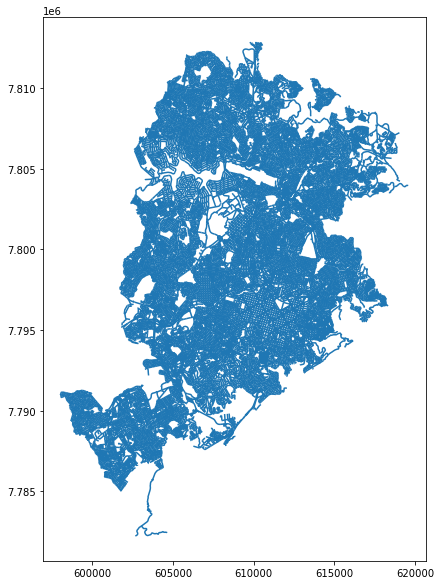

In [22]:
# Carregar um arquivo GeoJSON em um GeoDataFrame
# gdf = gpd.read_file('meu_arquivo.geojson')

# Definir a coluna de geometria
# gdf = dados4.set_geometry('GEOMETRIA')

# # Plotar os dados
# gdf.plot()

# # Mostrar o gráfico
# plt.show()



# Converter as strings em objetos de geometria
dados4['GEOMETRIA'] = dados4['GEOMETRIA'].apply(wkt.loads)

# Definir a coluna de geometria
gdf = dados4.set_geometry('GEOMETRIA')

# Plotar os dados
gdf.plot(figsize = (10, 10))

# Mostrar o gráfico
plt.show()
